<a href="https://colab.research.google.com/github/BlazeNut728/INSAID-Fraud-Detection/blob/main/INSAID_Intership_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connecting Google Colab to Drive

In [23]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/Fraud.csv

/content/drive/MyDrive/Fraud.csv


Importing Dependencies & Checking Data

In [4]:
import numpy as np
import pandas as pd

td = pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [5]:
td.shape

(6362620, 11)

Analyzing The Data

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
td.isnull().values.any()

False

In [8]:
td['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Dataset Counting & Visulization

In [9]:
legit = len(td.isFraud == 0)
print("No of Legit transactions: ", legit)
fraud = len(td[td.isFraud == 1])
print("No of Fraud transactions: ", fraud)
legit_percentage = (legit / (fraud + legit)) * 100
print("Percentage of Legit transactions: {:.4f} %".format(legit_percentage))
fraud_percentage = (fraud / (fraud + legit)) * 100
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percentage))

No of Legit transactions:  6362620
No of Fraud transactions:  8213
Percentage of Legit transactions: 99.8711 %
Percentage of Fraud transactions: 0.1289 %


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

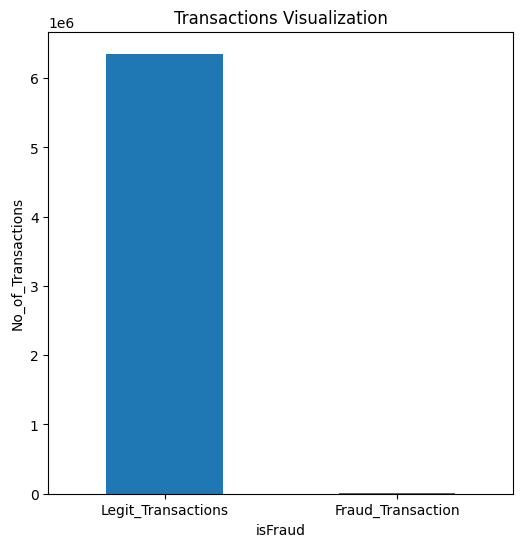

In [11]:
plt.figure(figsize=(6,6))
labels = ["Legit_Transactions", "Fraud_Transaction"]
count_classes = td.value_counts(td['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Transactions Visualization")
plt.ylabel("No_of_Transactions")
plt.xticks(range(2), labels)
plt.show()

Solving The Problem

In [12]:
nd=td.copy()
nd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
nl = nd.select_dtypes(include = "object").columns
print ("Variables with Datatype - 'object' are:")
print (nl)

Variables with Datatype - 'object' are:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [14]:
label_encode = LabelEncoder()
for i in nl:
    nd[i] = label_encode.fit_transform(nd[i].astype(str))
print (nd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


Multicolinearity Checking

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(td):

    vif = pd.DataFrame()
    vif["Variables"] = td.columns
    vif["Variance Inflation Factor"] = [variance_inflation_factor(td.values, i) for i in range(td.shape[1])]

    return(vif)

cal_vif(nd)

,Variables,Variance Inflation Factor
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [16]:
nd['Balance_Origin'] = nd.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
nd['Balance_Destination'] = nd.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
nd['Name'] = nd.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

nd = nd.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

cal_vif(nd)

,Variables,Variance Inflation Factor
0,step,2.710678
1,type,2.863989
2,amount,3.890535
3,isFraud,1.189937
4,isFlaggedFraud,1.002563
5,Balance_Origin,1.332185
6,Balance_Destination,3.790322
7,Name,3.472358


<ipython-input-17-6e07e75d7b27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=td.corr()


<Axes: >

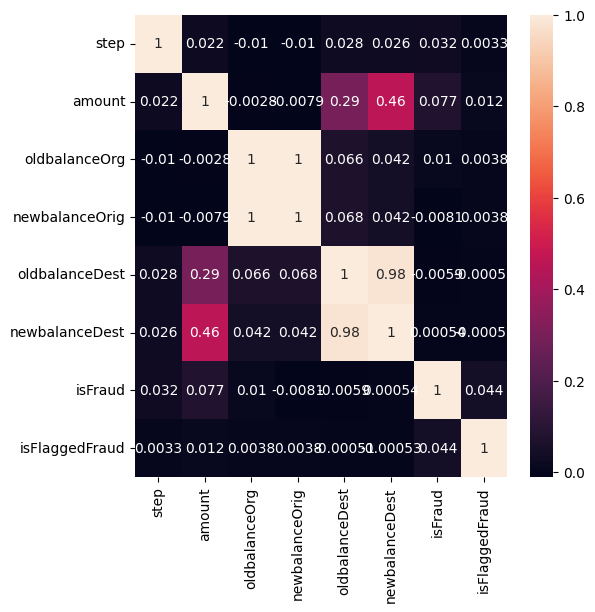

In [17]:
corr=td.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

<Axes: >

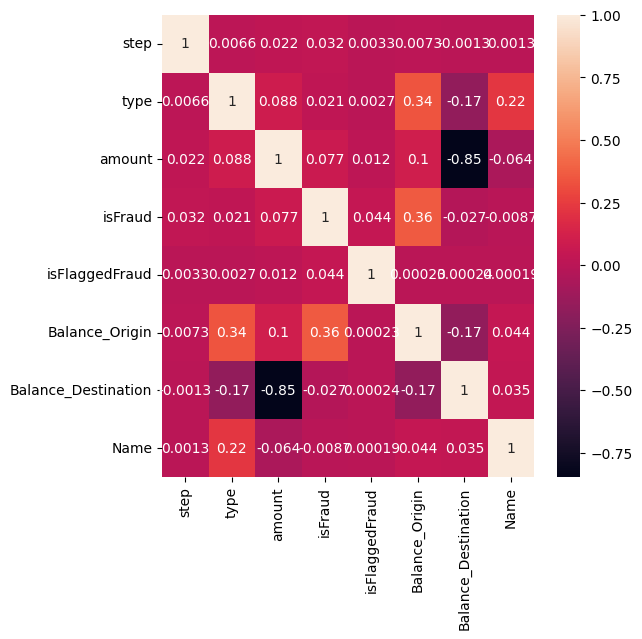

In [18]:
corr=nd.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

# Building & Training The Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = nd.drop(columns='isFraud', axis=1)
Y = nd['isFraud']

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 7)
Shape of X_test:  (1908786, 7)


In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

Y_pred_dt = dt.predict(X_test)
dt_score = dt.score(X_test, Y_test) * 100

print("Decision Tree Score: ", dt_score)

# Decision Tree /\

Decision Tree Score:  99.94205741240768


In [21]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
rf_score = rf.score(X_test, Y_test) * 100

print("Random Forest Score: ", rf_score)

# Random Forest /\

Random Forest Score:  99.96400853736354


# Final Report

In [25]:
cr_dt = classification_report(Y_test, Y_pred_dt)
print("Decision Tree:")
print(cr_dt)

# Decision Tree /\

cr_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report for Random Forest:")
print(cr_rf)

# Random Forest /\

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.77      0.77      0.77      2435

    accuracy                           1.00   1908786
   macro avg       0.89      0.89      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.74      0.84      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

